In [6]:
import pandas as pd
import numpy as np


In [7]:
df = pd.read_csv('sales_data_with_discounts.csv')

In [8]:
df.head(5)

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [10]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


# to identify numerical and categorical columns and grouping them for simplicity and avoid redundant code

In [11]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print('numrical_cols:',numerical_columns)
print('categorical_cols',categorical_columns)

numrical_cols: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')
categorical_cols Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


# calculating statistical properties of the columns

In [12]:

statistics_df =pd.DataFrame({
    'mean':df[numerical_columns].mean(),
    'median':df[numerical_columns].median(),
    'mode':df[numerical_columns].mode().iloc[0],
    'standard_dev':df[numerical_columns].std()
})
statistics_df

,mean,median,mode,standard_dev
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


# Observations of the statistical columns
1.volume- 
in the statistical dataframe mean(5.066) is greater than median(4.0) and mode(3.0) hence it could be a right skewed destribition. The spread of the data or standard deviation is 4.23 which is high which indicates that there is significant spread in the data. Inference- most custtomers buy few items but some buy in bulk.

2.Average price
mean of avg price is higher which is 10453 compared to median and mode which is 1450 and 400 respectively. this can be interpreted as that the values are positively skewed due to small numbers of very high prices. and the standard deviation is 18079 which shows the price distribution and potential outliers.The inference is most items are low priced but some premium items causing skewness.

3.total sales value
mean is much greater here compared to median,mode 24300 shows that particular sales occur frequently.and high std deviation 50553.

4.discount rate
mean is 15.16 and meadian is 16.58 showing that they are close,mode is 5.01% which indicates a common discout percent. the standard deviation is 4.22 which is moderate compared to mean.

5.disc amount
disc amount is higher than median and mode . standarad deviation is high which is 4,509. 

6.net sales
mean is higher than median and mode. high standard deviation 46358 which suggest extreme dispersion. 

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# data visualization

●	Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.

# Numerical Columns

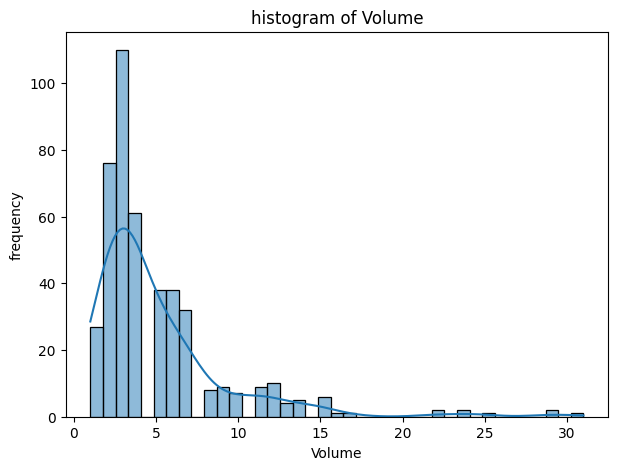

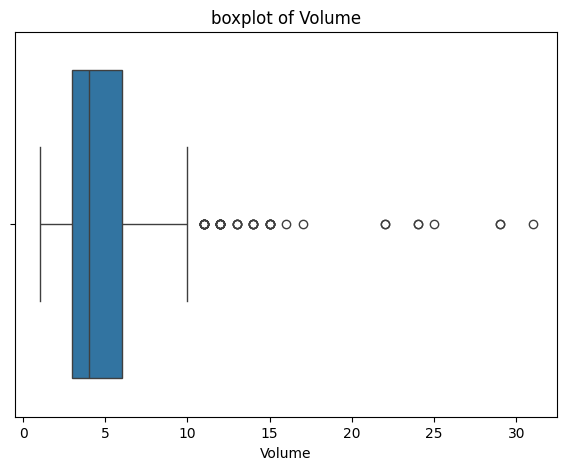

In [14]:
#histogram for volume
plt.figure(figsize=(7,5))
sns.histplot(data=df,x='Volume',kde=True)
plt.title(f'histogram of Volume')
plt.xlabel('Volume')
plt.ylabel('frequency')
plt.show()

#boxplot
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='Volume')
plt.title(f'boxplot of Volume')
plt.xlabel('Volume')

plt.show()

# inference for volume

from histogram-
    the distribution is right-skewed. mostly the sales involves small quantities or volumes. the bar stretching to the left side means some sales have large volumes.
    
from boxplot-
    the box indicates that most data lies inside the box  which means typical order volume is small.
    the median line is towards left which indicates that the values are clustered to lower end.
    the whisker extends to right side which means higher values exists but are less common. dots outside the whiskers represent the outliers.
    
final inference-
    The histogram shows a right-skewed distribution with most sales having low volume, while the boxplot shows several high-volume outliers extending towards right. This indicates that although most transactions are small, a few bulk orders significantly affect the average volume.

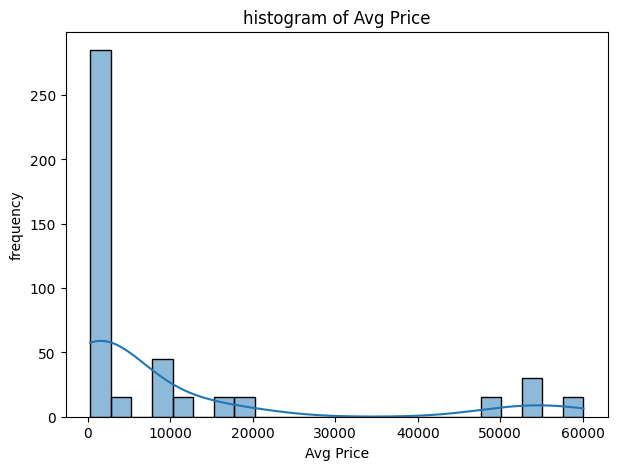

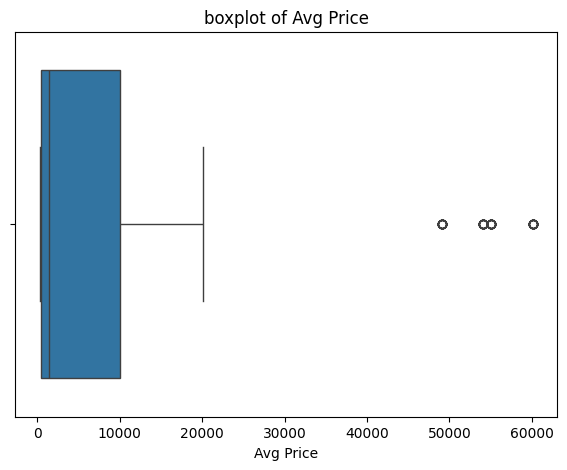

In [15]:
#histogram for Avg Price 
plt.figure(figsize=(7,5))
sns.histplot(data=df,x='Avg Price',kde=True)
plt.title(f'histogram of Avg Price')
plt.xlabel('Avg Price')
plt.ylabel('frequency')
plt.show()

#boxplot
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='Avg Price')
plt.title(f'boxplot of Avg Price')
plt.xlabel('Avg Price')

plt.show()

# inference for avg price

The histogram and boxplot of Avg Price show a right-skewed distribution with several high-value outliers. Most products are priced at lower values, while a few expensive items significantly increaseing the mean or avg price.
Although the box appears small due to extreme high-price outliers stretching the x-axis, it indicates that the middle 50% of Avg Price values are concentrated at lower price levels, while a few very high-priced items increase the overall range.

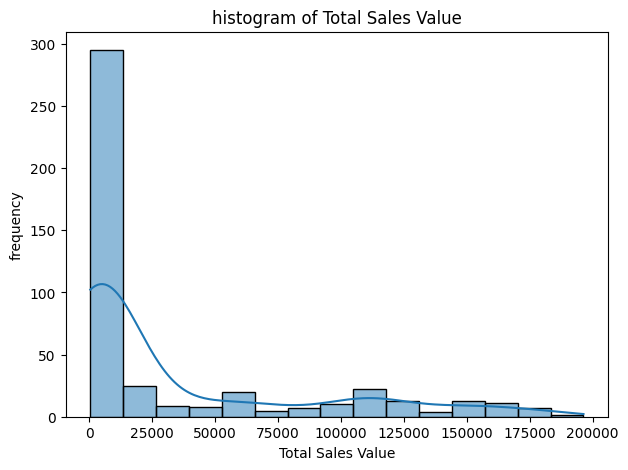

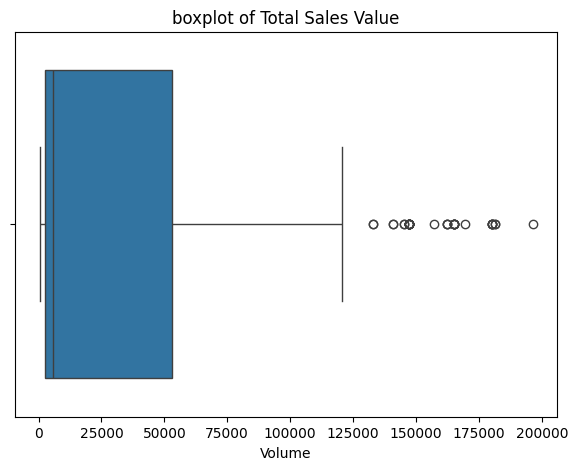

In [16]:
#histogram for total sales
plt.figure(figsize=(7,5))
sns.histplot(data=df,x='Total Sales Value',kde=True)
plt.title(f'histogram of Total Sales Value')
plt.xlabel('Total Sales Value')
plt.ylabel('frequency')
plt.show()

#boxplot
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='Total Sales Value')
plt.title(f'boxplot of Total Sales Value')
plt.xlabel('Volume')

plt.show()

# inference
from histogram-
     Most sales are small, but a few high-value transactions create a long right tail.
from boxplot-
     Middle sales are concentrated at low values  or left side, but a few large sales act as outliers and inflate the overall range.
     
The Total Sales Value distribution is strongly right-skewed: most sales are small, while a few high-value transactions act as outliers and increase the mean, which makes the median a better measure of typical sales.

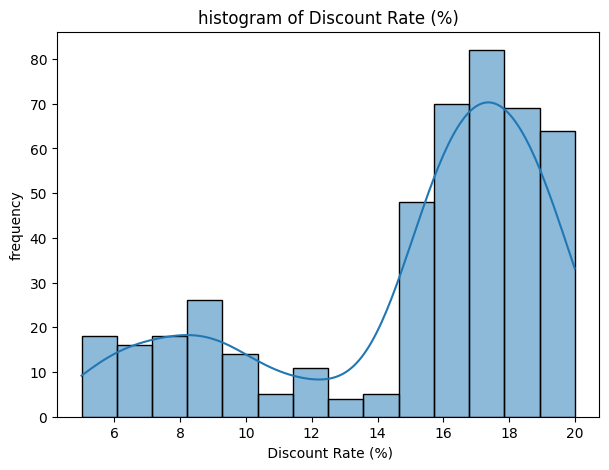

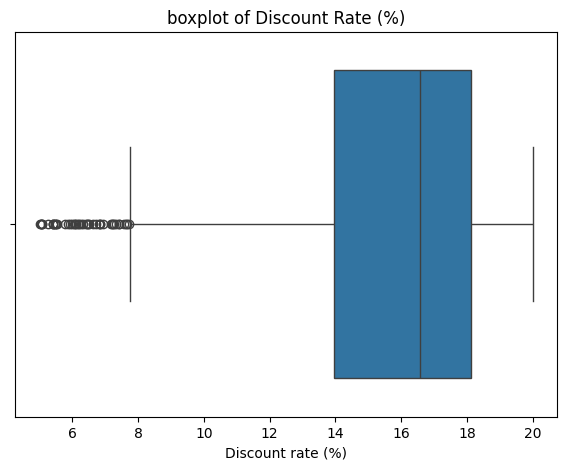

In [17]:
#histogram for Discount Rate (%)
plt.figure(figsize=(7,5))
sns.histplot(data=df,x='Discount Rate (%)',kde=True)
plt.title(f'histogram of Discount Rate (%)')
plt.xlabel(' Discount Rate (%)')
plt.ylabel('frequency')
plt.show()

#boxplot
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='Discount Rate (%)')
plt.title(f'boxplot of Discount Rate (%)')
plt.xlabel('Discount rate (%)')

plt.show()

# inference
from hist- The histogram shows a large peak around 16–18% (higher  discount rates).There is a smaller peak near 5–10%, which is where the mode lies.

from boxplot-The boxplot also shows most values are between 14% and 18%, with only a few low outliers (around 5–10%).

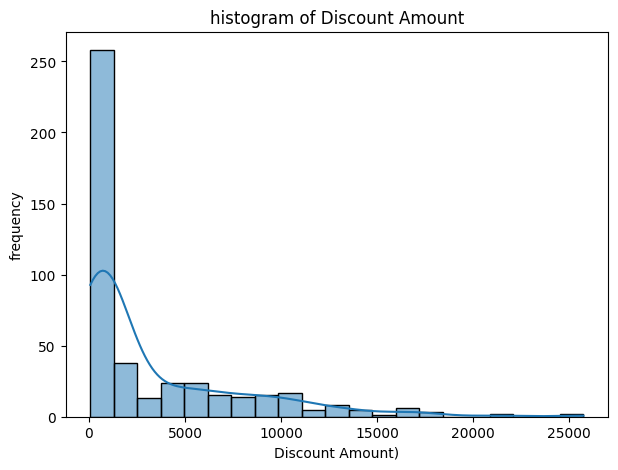

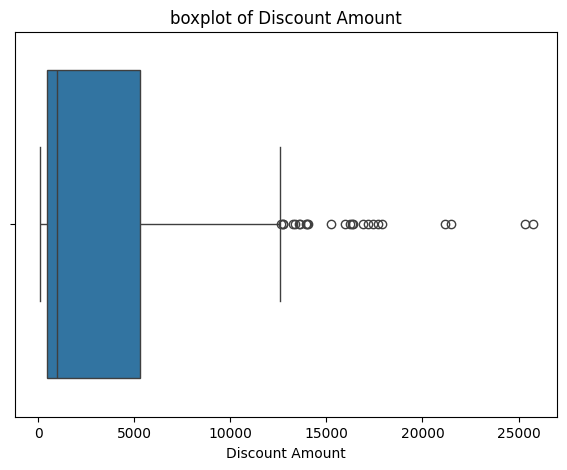

In [18]:
#histogram for Discount Rate (%)
plt.figure(figsize=(7,5))
sns.histplot(data=df,x='Discount Amount',kde=True)
plt.title(f'histogram of Discount Amount')
plt.xlabel('Discount Amount)')
plt.ylabel('frequency')
plt.show()

#boxplot
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='Discount Amount')
plt.title(f'boxplot of Discount Amount')
plt.xlabel('Discount Amount')

plt.show()

# inference
from histogram-the histogram shows higly right skewed distribution.most discounts are clustered at lower values while some higher values have rarer discount amount.

from boxplot- the boxplot shows that IQR is relatively low caompared to the maximum values. most data points are below 5000 and there are also outliers which are on higher values.

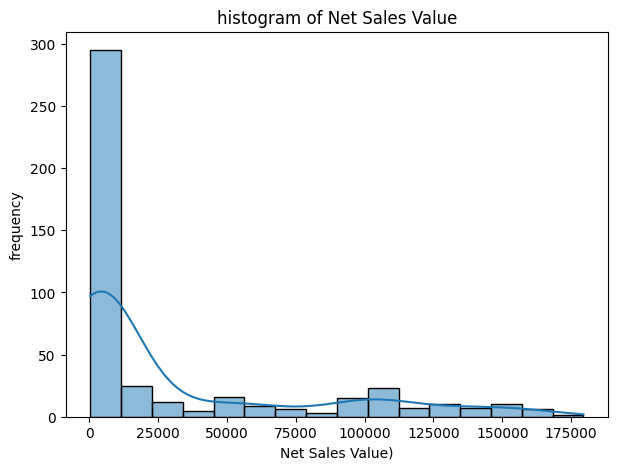

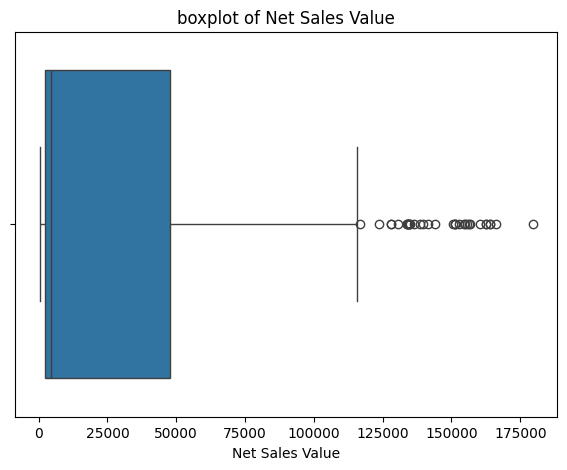

In [19]:
#histogram for Discount Rate (%)
plt.figure(figsize=(7,5))
sns.histplot(data=df,x='Net Sales Value',kde=True)
plt.title(f'histogram of Net Sales Value')
plt.xlabel('Net Sales Value)')
plt.ylabel('frequency')
plt.show()

#boxplot
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='Net Sales Value')
plt.title(f'boxplot of Net Sales Value')
plt.xlabel('Net Sales Value')

plt.show()

# inference
from histogram- the  distribution is highly right-skewed, most transactions have low net values while few transactions reach higher ends.

from boxplot-the boxplot also shows that most net sale values lies withing smaller range with large numbers of extreme outliers.

# Categorical Columns

 Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


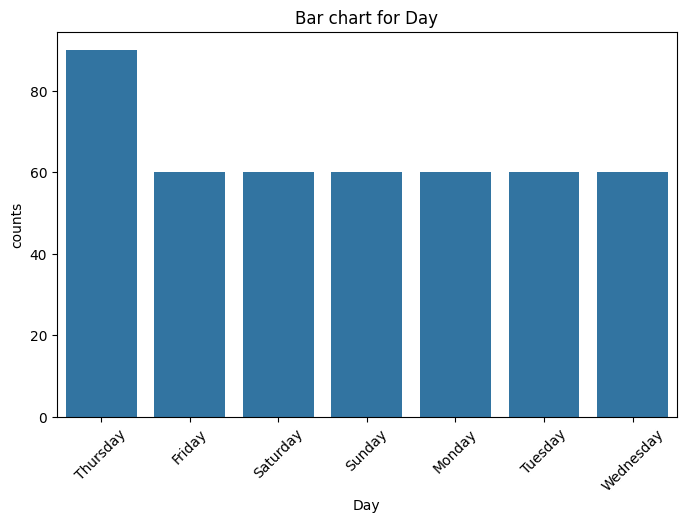

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Day')
plt.title('Bar chart for Day')
plt.xlabel('Day')
plt.ylabel('counts')
plt.xticks(rotation=45)
plt.show()

Above chart shows that thursday has the highest count of records and rest of the day has equal counts

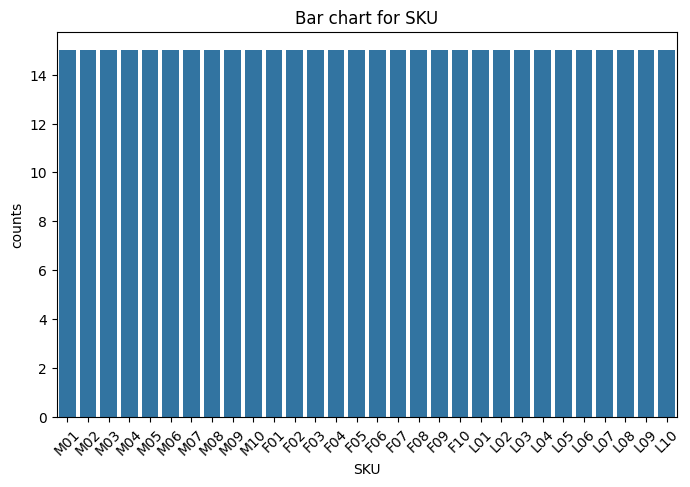

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='SKU')
plt.title('Bar chart for SKU')
plt.xlabel('SKU')
plt.ylabel('counts')
plt.xticks(rotation=45)
plt.show()

Above chart indicates that the SKU is equally distributed

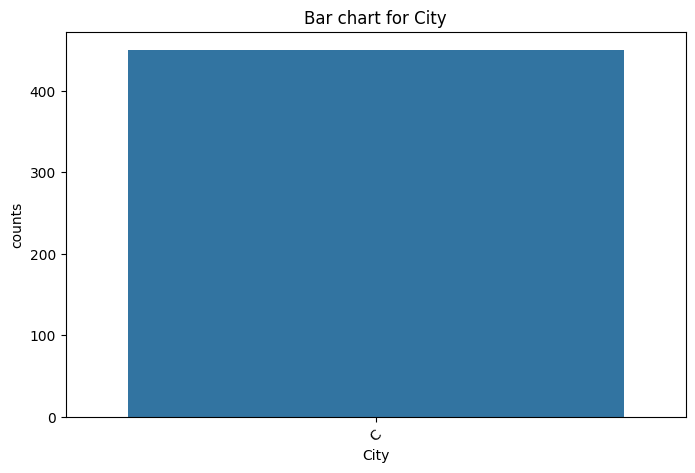

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='City')
plt.title('Bar chart for City')
plt.xlabel('City')
plt.ylabel('counts')
plt.xticks(rotation=45)
plt.show()

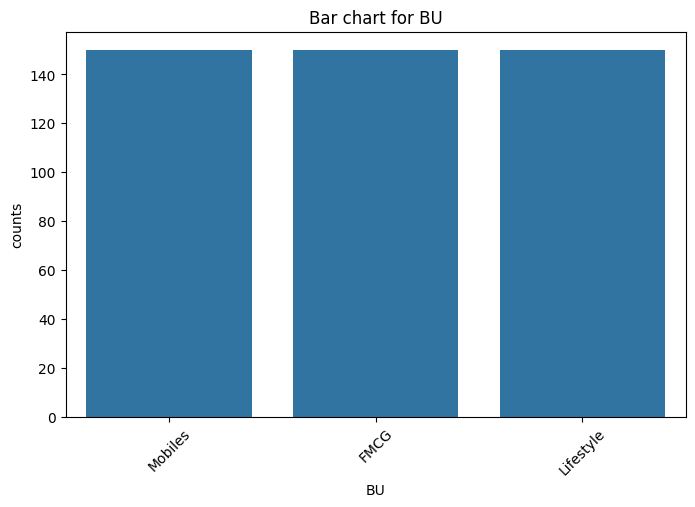

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='BU')
plt.title('Bar chart for BU')
plt.xlabel('BU')
plt.ylabel('counts')
plt.xticks(rotation=45)
plt.show()

the chart shows that all BU have equal counts

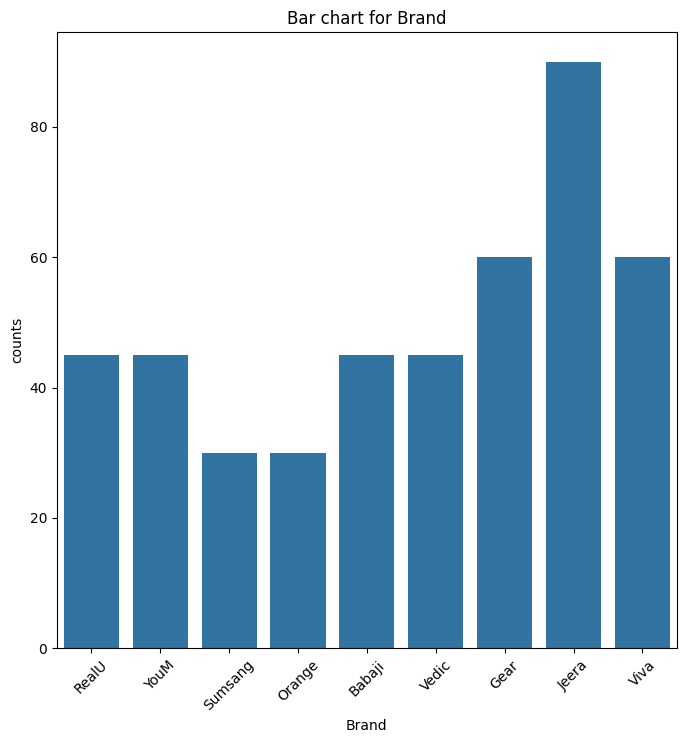

In [24]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='Brand')
plt.title('Bar chart for Brand')
plt.xlabel('Brand')
plt.ylabel('counts')
plt.xticks(rotation=45)
plt.show()

The bar chart shows that 'jeera' has the highest count/sales among all brands while samsung and orange has almost equal and lowest

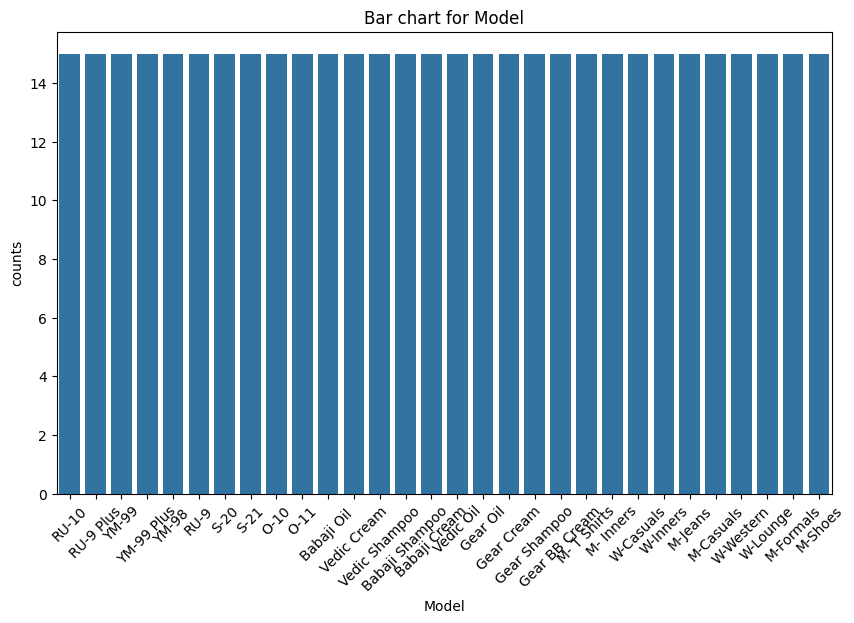

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Model')
plt.title('Bar chart for Model')
plt.xlabel('Model')
plt.ylabel('counts')
plt.xticks(rotation=45)
plt.show()

# Standardizationo of numerical variables

Objective: To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.

Definition- standardization transforms numerical data so that the mean becomes 0 and standard deviation becomes 1.

formulala-    Z= xi-mu/sigma,
                where,
                xi= value from the dataset or the original value,
                mu-mean,
                sigma- standard deviation


In [26]:
#before standardization
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [27]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

df_scaled= df.copy() # creating a copy so we can use it for later
df_scaled[numerical_columns]=scaler.fit_transform(df[numerical_columns])


In [28]:
#after scaling
df_scaled[numerical_columns].agg(['mean','std'])

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
mean,6.118562e-17,3.157968e-17,1.578984e-17,-3.552714e-17,-5.526444e-17,1.973730e-17
std,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00


After standardization or z-score normalization all numerical variables have mean approximatly 0 and standard deviation approximately 1

# Conversion of Categorical Data into Dummy Variables
Objective: To transform categorical variables into a format that can be provided to ML algorithms.


In [29]:
encoded_data = pd.get_dummies(df_scaled,columns=categorical_columns,drop_first=True,dtype=int)

In [30]:
encoded_data

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Above is the transformed data using pandas one hot encoding

In [31]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 94 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Volume                450 non-null    float64
 1   Avg Price             450 non-null    float64
 2   Total Sales Value     450 non-null    float64
 3   Discount Rate (%)     450 non-null    float64
 4   Discount Amount       450 non-null    float64
 5   Net Sales Value       450 non-null    float64
 6   Date_02-04-2021       450 non-null    int32  
 7   Date_03-04-2021       450 non-null    int32  
 8   Date_04-04-2021       450 non-null    int32  
 9   Date_05-04-2021       450 non-null    int32  
 10  Date_06-04-2021       450 non-null    int32  
 11  Date_07-04-2021       450 non-null    int32  
 12  Date_08-04-2021       450 non-null    int32  
 13  Date_09-04-2021       450 non-null    int32  
 14  Date_10-04-2021       450 non-null    int32  
 15  Date_11-04-2021       4

# Conclusion

The descriptive analysis and visualization  helped in understanding the distribution,variability and patterns in the sales data. kkey numerical features such as sales value,price and discounts showes some meaningfull variations which was shown by plots.

Data processing is crucial for preparing the dataset for further analysis and modelling. standardization ensured that numerical vaariables were braught on normal scales,preventing the other features with larger values from domination the entire analysis. one hot encoding converted the categorical into numerical format so machine learning models can understand them.